<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#CatBoostingRegressor" data-toc-modified-id="CatBoostingRegressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>CatBoostingRegressor</a></span></li><li><span><a href="#LightGBM-Regressor" data-toc-modified-id="LightGBM-Regressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>LightGBM Regressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

### Описание данных <a class="tocSkip">

<div style="border:solid green 5px; padding: 16px; border-radius: 10px"> 
    
**<font color="green">Признаки</font>**     
<br>DateCrawled — дата скачивания анкеты из базы
<br>VehicleType — тип автомобильного кузова
<br>RegistrationYear — год регистрации автомобиля
<br>Gearbox — тип коробки передач
<br>Power — мощность (л. с.)
<br>Model — модель автомобиля
<br>Kilometer — пробег (км)
<br>RegistrationMonth — месяц регистрации автомобиля
<br>FuelType — тип топлива
<br>Brand — марка автомобиля
<br>NotRepaired — была машина в ремонте или нет
<br>DateCreated — дата создания анкеты
<br>NumberOfPictures — количество фотографий автомобиля
<br>PostalCode — почтовый индекс владельца анкеты (пользователя)
<br>LastSeen — дата последней активности пользователя
    
**<font color="green">Целевой признак</font>**     
<br>Price — цена (евро)

## Анализ данных

In [64]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from catboost import cv, Pool
import lightgbm as lgb
import time
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from lightgbm import plot_importance
from tqdm import tqdm

In [2]:
df = pd.read_csv("/datasets/autos.csv") # Загрузим данные

In [3]:
df.head() # Посмотрим первые 5 строк

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.info(memory_usage='deep') #Выведем информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

<div style="border:solid green 5px; padding: 16px; border-radius: 10px">   
<br> В таблице 354369 строк. Нужно поменять тип данных в столбцах DateCrawled, DateCreated и LastSeen на datetime.
<br> В столбцах есть пропуски (5-20%), все эти пропуски с типом данных object. Чтобы не искажать данные на их месте поставим заглушку (no_info).

In [5]:
df.isna().mean() # Посмотрим пропущенные значения

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

In [6]:
df.describe().T # выведем стат данные

,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


<div style="border:solid green 5px; padding: 16px; border-radius: 10px">   
<br> Price - нужно внимательнее рассмотреть столбец. Медианна(4416) и среднее (2700.0) сильно отличается от максимального значения (20000.0). Кроме этого, есть нулевые значения.
<br> RegistrationYear - явные выбросы в столбце. Значения не могут быть больше 2016 года (год когда собрали данные) и меньше 1960 года (когда примерно серийно начали выпускать автомобили)
<br> Power - явные выбросы в столбце. Нужно внимательно рассмотреть столбец.
<br> Kilometer - явные аномалии в столбце. Видимо при заполнении пробег ограничен 150000 км. Менять ничего не будем.
<br> NumberOfPictures - данных в столбце нет. Его мы удалим.

In [7]:
df.duplicated().sum() # Проверим количество дубликатов

4

In [8]:
df.drop_duplicates(inplace = True) # удалим дубликаты
df.duplicated().sum()

0

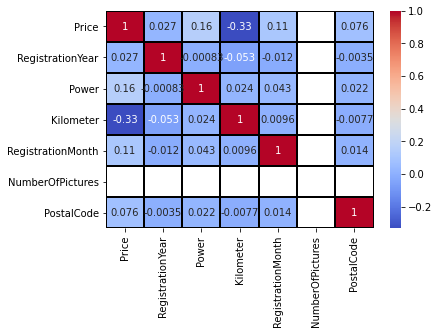

In [9]:
sns.heatmap(df.corr(), cmap= 'coolwarm', linewidths=1, linecolor='black', annot = True, fmt='.2g'); 
# построим тепловую карту корреляции

<div style="border:solid green 5px; padding: 16px; border-radius: 10px">   
<br> Видна небольшая отрицательная корреляция между ценой и пробегом автомобиля (-0,33). В остальном зависимость не прослеживается. Возможно после предобработки корреляция изменится.

### Вывод

<br> В таблице 354369 строк. Нужно поменять тип данных в столбцах DateCrawled, DateCreated и LastSeen на datetime.
<br> В столбцах есть пропуски (5-20%), все эти пропуски с типом данных object. Чтобы не искажать данные на их месте поставим заглушку (no_info).
<br> Price - нужно внимательнее рассмотреть столбец. Медианна(4416) и среднее (2700.0) сильно отличается от максимального значения (20000.0). Кроме этого, есть нулевые значения.
<br> RegistrationYear - явные выбросы в столбце. Значения не могут быть больше 2016 года (год когда собрали данные) и меньше 1960 года (когда примерно серийно начали выпускать автомобили)
<br> Power - явные выбросы в столбце. Нужно внимательно рассмотреть столбец.
<br> Kilometer - явные аномалии в столбце. Видимо при заполнении пробег ограничен 150000 км. Менять ничего не будем.
<br> NumberOfPictures - данных в столбце нет. Его мы удалим.
<br> Видна небольшая отрицательная корреляция между ценой и пробегом автомобиля (-0,33). В остальном зависимость не прослеживается. Возможно после предобработки корреляция изменится.

## Предобработка данных

In [10]:
# Изменим тип данных в  DateCrawled, DateCreated и LastSeen
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'],format= '%Y-%m-%d %H:%M:%S') 
df['DateCreated'] = pd.to_datetime(df['DateCreated'],format= '%Y-%m-%d %H:%M:%S') 
df['LastSeen'] = pd.to_datetime(df['LastSeen'],format= '%Y-%m-%d %H:%M:%S') 

In [11]:
#Запишем столбцы категориальных переменных
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [12]:
# Заполним пропуски заглушкой no_info
df[cat_features] = df[cat_features].fillna('no_info')

AxesSubplot(0.125,0.125;0.775x0.755)


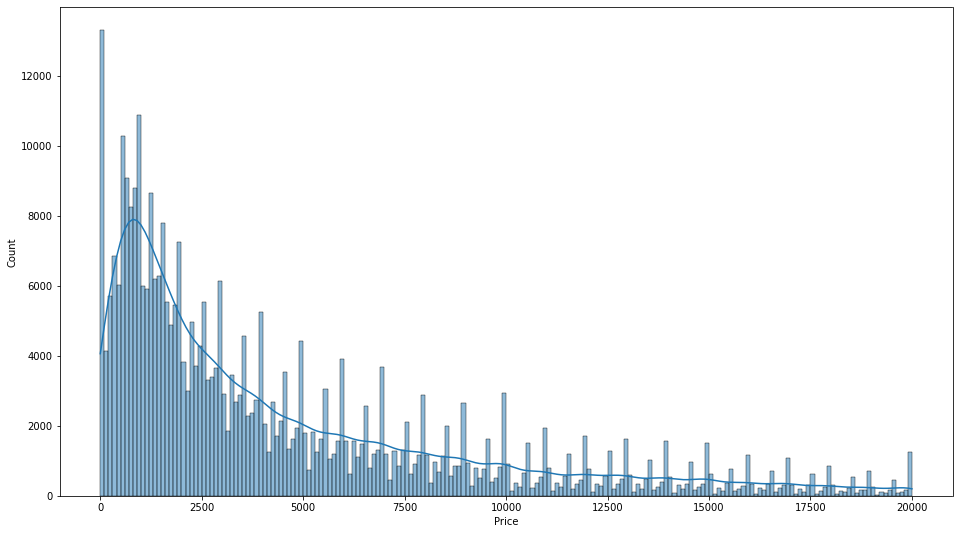

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


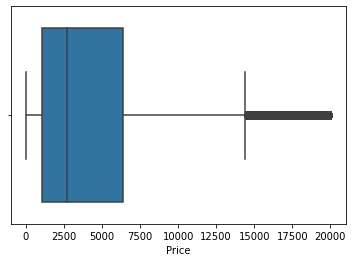

In [13]:
# Рассмотрим столбец Price 
plt.figure(figsize=(16,9))
print(sns.histplot(data = df['Price'],bins=200, kde=True))
plt.show()
sns.boxplot(df['Price']);

In [14]:
df.loc[(df['Price']>18000) &(df['Price']<20000)].head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,no_info,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
172,2016-03-07 12:38:19,19750,convertible,2006,manual,305,mustang,50000,7,petrol,ford,no,2016-03-07,0,38350,2016-03-12 20:18:29
204,2016-03-31 12:58:26,18400,wagon,2011,auto,313,5er,150000,11,gasoline,bmw,no,2016-03-31,0,52477,2016-03-31 13:44:44
282,2016-03-06 12:38:13,18700,coupe,2009,auto,213,mustang,80000,8,petrol,ford,no,2016-03-06,0,97424,2016-04-06 05:44:39
337,2016-03-20 11:44:15,18880,bus,2014,manual,116,5_reihe,20000,11,gasoline,mazda,no,2016-03-20,0,59872,2016-04-06 08:46:43


In [15]:
# Удаляю выбросы по цене. Оставляю данные от 100 евро. По выведенным данным автомобили от 18000 реальны и могут столько стоить.
print('Удалили из столбца Price:', len(df.loc[(df['Price']<=100)]), 'строк')
df = df.loc[(df['Price']>100)]

Удалили из столбца Price: 14345 строк


In [16]:
# Рассмотрим столбец RegistrationYear
print('Удалили из столбца RegistrationYear:', len(df) - len(df.loc[(df['RegistrationYear']<=2016) & (df['RegistrationYear']>=1960)]), 'строк')
df = df.loc[(df['RegistrationYear']<=2016) & (df['RegistrationYear']>=1960)]

Удалили из столбца RegistrationYear: 13970 строк


AxesSubplot(0.125,0.125;0.775x0.755)


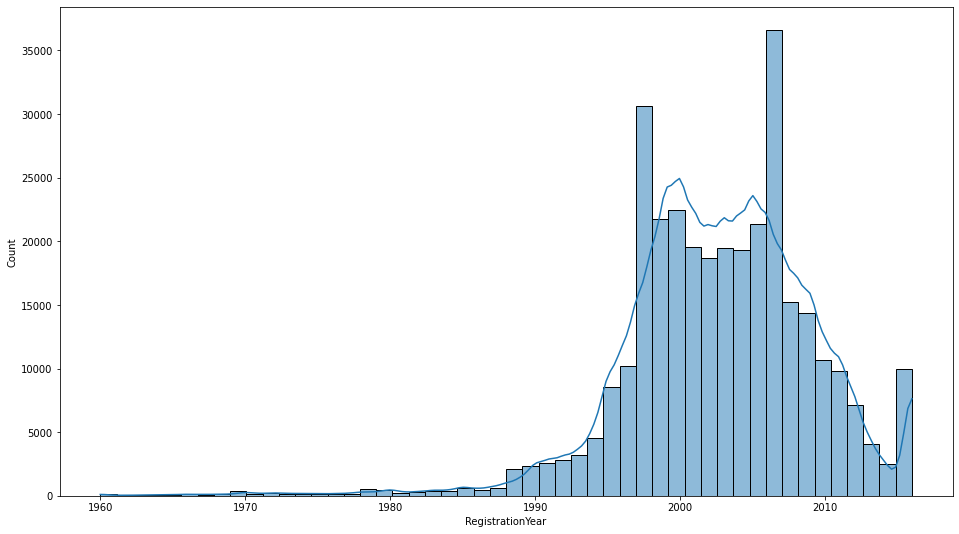

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


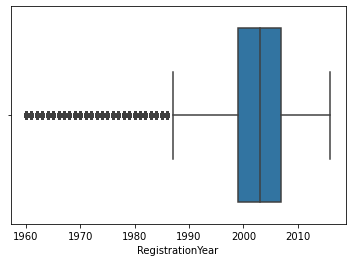

In [17]:
plt.figure(figsize=(16,9))
print(sns.histplot(data = df['RegistrationYear'],bins=50, kde=True))
plt.show()
sns.boxplot(df['RegistrationYear']);

In [18]:
df.loc[(df['RegistrationYear']<=1970) & (df['RegistrationYear']>=1960)].head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
630,2016-03-18 12:43:41,12000,sedan,1969,manual,140,s_klasse,80000,3,petrol,mercedes_benz,no,2016-03-18,0,46286,2016-04-05 22:16:44
1331,2016-04-03 19:53:44,650,no_info,1970,no_info,26,no_info,100000,5,no_info,trabant,no_info,2016-04-03,0,9337,2016-04-05 20:45:24
1794,2016-04-03 21:49:57,12800,coupe,1965,manual,90,other,100000,8,petrol,ford,no,2016-04-03,0,12049,2016-04-05 23:15:21
1844,2016-03-31 19:50:00,1200,no_info,1970,manual,0,kaefer,150000,5,petrol,volkswagen,no_info,2016-03-31,0,90459,2016-04-06 14:17:55
2262,2016-03-09 14:45:05,6500,convertible,1965,auto,360,no_info,150000,6,petrol,sonstige_autos,no_info,2016-03-09,0,67105,2016-04-06 08:46:00


In [19]:
# Рассмотрим столбец Power
print('Удалили из столбца Power:', len(df.loc[(df['Power']>=360)]), 'строк')
df = df.loc[(df['Power']<360)]

Удалили из столбца Power: 1001 строк


AxesSubplot(0.125,0.125;0.775x0.755)


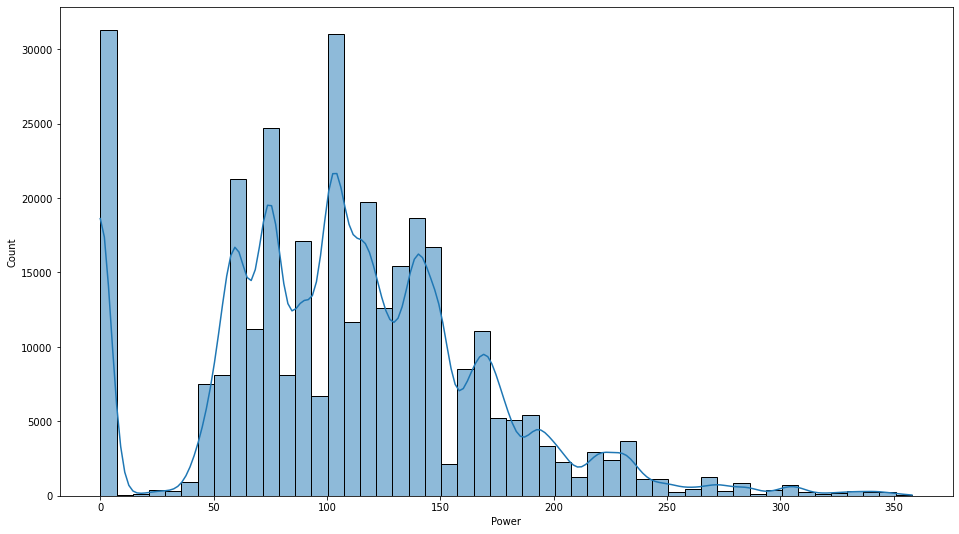

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


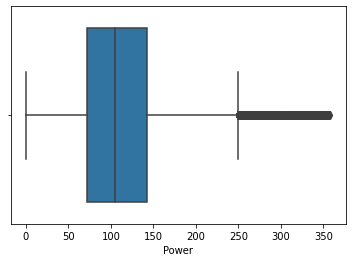

In [20]:
plt.figure(figsize=(16,9))
print(sns.histplot(data = df['Power'],bins=50, kde=True))
plt.show()
sns.boxplot(df['Power']);

In [21]:
#Удаляю столбец NumberOfPictures
del df['NumberOfPictures']
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325049 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        325049 non-null  datetime64[ns]
 1   Price              325049 non-null  int64         
 2   VehicleType        325049 non-null  object        
 3   RegistrationYear   325049 non-null  int64         
 4   Gearbox            325049 non-null  object        
 5   Power              325049 non-null  int64         
 6   Model              325049 non-null  object        
 7   Kilometer          325049 non-null  int64         
 8   RegistrationMonth  325049 non-null  int64         
 9   FuelType           325049 non-null  object        
 10  Brand              325049 non-null  object        
 11  NotRepaired        325049 non-null  object        
 12  DateCreated        325049 non-null  datetime64[ns]
 13  PostalCode         325049 non-null  int64   

In [22]:
df.reset_index(drop=True)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,no_info,1993,manual,0,golf,150000,0,petrol,volkswagen,no_info,2016-03-24,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,no_info,125000,5,gasoline,audi,yes,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no_info,2016-03-14,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325044,2016-03-27 20:36:20,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,2016-03-27,26624,2016-03-29 10:17:23
325045,2016-03-14 17:48:27,2200,no_info,2005,no_info,0,no_info,20000,1,no_info,sonstige_autos,no_info,2016-03-14,39576,2016-04-06 00:46:52
325046,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,26135,2016-03-11 18:17:12
325047,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,87439,2016-04-07 07:15:26


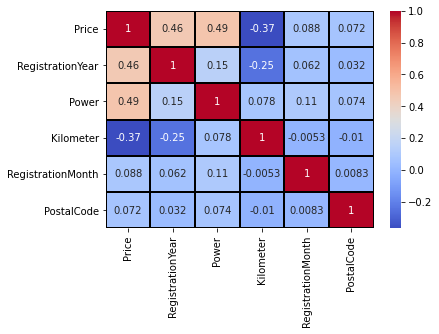

In [23]:
sns.heatmap(df.corr(), cmap= 'coolwarm', linewidths=1, linecolor='black', annot = True, fmt='.2g'); 
# построим тепловую карту корреляции

### Вывод

<br> В ходе предобработки пришлось удалить 29320 строк (8,27% данных). В результате заметно улучшилась корреляция между ценой и столбцами с годом регистрации (0,46), мощностью (0,49), пробегом  (-0,37), что совершенно логично.
<br> Все пропуски заполнили заглушками (no_info).
<br>Изменили тип данных в  DateCrawled, DateCreated и LastSeen на формат даты.

## Подготовка данных

In [24]:
train, test = train_test_split(df,train_size=0.8,random_state=42) #Разделим данные на тестовую и обучающую выборку

In [25]:
print(train.shape)
print(test.shape)

(260039, 15)
(65010, 15)


In [26]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'PostalCode', 'LastSeen'],
      dtype='object')

In [27]:
# 'DateCrawled', 'DateCreated','LastSeen' в обучении модели участия не принимают. Пользы от них нет.
X = [ 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth','PostalCode',
    'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'] #Признаки 

cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'] #Категорилаьные признаки

y = ['Price'] #Целевой признак

### Вывод

<br> Данные подготовлены для построения моделей.

## Обучение моделей

### CatBoostingRegressor

In [28]:
train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features, 
                 )
test_data = Pool(data=test[X],
                  label=test[y],
                  cat_features=cat_features,
                 )

In [29]:
#Запишем параметры для модели
params = {'cat_features': cat_features,
              'eval_metric': 'RMSE',
          'loss_function': 'RMSE',
              'learning_rate': 0.15,
              'random_seed': 42,
              'verbose':100,
         'iterations': 1000}

In [30]:
%%time
model = CatBoostRegressor()
paramsCBR = {
    'learning_rate': [0.3, 0.4],
    'iterations' : [500,1000],
    'verbose' : [100],
    'random_seed' : [42],
    }
grid_cv = GridSearchCV(estimator=model, 
param_grid=paramsCBR, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
grid_cv.fit(train[X], train[y],  cat_features=cat_features)
print('Best hyperparams: ', grid_cv.best_params_)
print('CatBoostRegressor RMSE on train: ', -grid_cv.best_score_)

0:	learn: 3698.8384654	total: 402ms	remaining: 3m 20s
100:	learn: 1632.5359132	total: 19.1s	remaining: 1m 15s
200:	learn: 1568.3203661	total: 38s	remaining: 56.5s
300:	learn: 1526.0099469	total: 56.7s	remaining: 37.5s
400:	learn: 1497.7138615	total: 1m 15s	remaining: 18.6s
499:	learn: 1473.4632425	total: 1m 33s	remaining: 0us
0:	learn: 3673.7225879	total: 225ms	remaining: 1m 52s
100:	learn: 1620.2338714	total: 18.1s	remaining: 1m 11s
200:	learn: 1559.7700718	total: 35.3s	remaining: 52.5s
300:	learn: 1518.2517239	total: 54s	remaining: 35.7s
400:	learn: 1488.3972961	total: 1m 12s	remaining: 17.8s
499:	learn: 1460.8484352	total: 1m 31s	remaining: 0us
0:	learn: 3668.7295921	total: 216ms	remaining: 1m 47s
100:	learn: 1635.8237783	total: 18.1s	remaining: 1m 11s
200:	learn: 1569.0106865	total: 35.9s	remaining: 53.4s
300:	learn: 1527.5761065	total: 54.3s	remaining: 35.9s
400:	learn: 1496.9211696	total: 1m 12s	remaining: 18s
499:	learn: 1470.7845670	total: 1m 32s	remaining: 0us
0:	learn: 3452.3

In [69]:
#Запишем лучшие параметры для модели
paramsCBR = {
    'cat_features': cat_features,
    'learning_rate':  0.3 ,
    'iterations' : 1000,
    'verbose' : 100,
    'random_seed' : 42,
    }

In [70]:
%%time
modelCBR = CatBoostRegressor(**paramsCBR) #Обучение модели
modelCBR.fit(train_data)
predictionCBR = modelCBR.predict(test_data)
print('CatBoostRegressor RMSE on test: ', np.sqrt(mse(test[y],predictionCBR)))

0:	learn: 3679.3973270	total: 380ms	remaining: 6m 19s
100:	learn: 1630.2237979	total: 26.3s	remaining: 3m 53s
200:	learn: 1570.0121707	total: 51.4s	remaining: 3m 24s
300:	learn: 1531.5706340	total: 1m 17s	remaining: 3m
400:	learn: 1503.0901967	total: 1m 44s	remaining: 2m 35s
500:	learn: 1481.1825722	total: 2m 12s	remaining: 2m 11s
600:	learn: 1463.9309216	total: 2m 40s	remaining: 1m 46s
700:	learn: 1448.2139199	total: 3m 8s	remaining: 1m 20s
800:	learn: 1434.2494724	total: 3m 36s	remaining: 53.8s
900:	learn: 1420.1548619	total: 4m 2s	remaining: 26.7s
999:	learn: 1409.0547689	total: 4m 28s	remaining: 0us
CatBoostRegressor RMSE on test:  1550.9718317661147
CPU times: user 4min 31s, sys: 712 ms, total: 4min 31s
Wall time: 4min 32s


### LightGBM Regressor

In [33]:
train[cat_features] = train[cat_features].astype('category') #Поменяем тип данных категориальных переменных
test[cat_features] = test[cat_features].astype('category') # LightGBM не принмает тип данных object

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [71]:
%%time
model = LGBMRegressor()
params_light = {
        'boosting_type' : ['gbdt'],
        'n_estimators' : [1200],
        'max_depth' : [8,10],
        'verbose' : [100],
        'random_seed' : [42],
        'force_col_wise': [True],
        'num_leaves' : [50, 70]}
grid_cv = GridSearchCV(estimator=model, param_grid=params_light, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
grid_cv.fit(train[X], train[y], categorical_feature=cat_features)
print('Best hyperparams: ', grid_cv.best_params_)
print('LightGBM RMSE on train:', -grid_cv.best_score_)

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745069
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 173359, number of used features: 11
[LightGBM] [Info] Start training from score 4648.553182
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Tra

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745084
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 173359, number of used features: 11
[LightGBM] [Info] Start training from score 4629.915989
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Tra

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745290
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 173360, number of used features: 11
[LightGBM] [Info] Start training from score 4635.445910
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Tra

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745069
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 173359, number of used features: 11
[LightGBM] [Info] Start training from score 4648.553182
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Tra

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745084
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 173359, number of used features: 11
[LightGBM] [Info] Start training from score 4629.915989
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Tra

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745290
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 173360, number of used features: 11
[LightGBM] [Info] Start training from score 4635.445910
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Tra

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745069
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 173359, number of used features: 11
[LightGBM] [Info] Start training from score 4648.553182
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 10
[LightGBM] [Debug] T

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745084
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 173359, number of used features: 11
[LightGBM] [Info] Start training from score 4629.915989
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 10
[LightGBM] [Debug] T

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745290
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 173360, number of used features: 11
[LightGBM] [Info] Start training from score 4635.445910
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 50 and depth = 9
[LightGBM] [Debug] Tra

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745069
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 173359, number of used features: 11
[LightGBM] [Info] Start training from score 4648.553182
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745084
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 173359, number of used features: 11
[LightGBM] [Info] Start training from score 4629.915989
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.745290
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 173360, number of used features: 11
[LightGBM] [Info] Start training from score 4635.445910
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Deb

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.744940
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 260039, number of used features: 11
[LightGBM] [Info] Start training from score 4637.971689
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[LightGBM] [Debug]

In [72]:
params_light = {
        'boosting_type' : 'gbdt',
        'n_estimators' : 1200,
        'max_depth' : 10,
        'verbose' : 100,
        'random_seed' : 42,
        'force_col_wise': True,
        'num_leaves' : 70}

In [73]:
%%time
model_lgb = LGBMRegressor(**params_light)
model_lgb.fit(train[X], train[y], eval_set=(train[X], train[y]),categorical_feature=cat_features, eval_metric='rmse')
predict_lgb = model_lgb.predict(test[X])
print('LightGBM RMSE on test', np.sqrt(mse(test[y],predict_lgb)))

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Brand', 'FuelType', 'Gearbox', 'Model', 'NotRepaired', 'VehicleType']
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.744940
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 260039, number of used features: 11


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Start training from score 4637.971689
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[1]	valid_0's rmse: 4176.17	valid_0's l2: 1.74404e+07
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[2]	valid_0's rmse: 3866.39	valid_0's l2: 1.4949e+07
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[3]	valid_0's rmse: 3593.62	valid_0's l2: 1.29141e+07
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[4]	valid_0's rmse: 3353.23	valid_0's l2: 1.12442e+07
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[5]	valid_0's rmse: 3138.87	valid_0's l2: 9.85254e+06
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[6]	valid_0's rmse: 2953.09	valid_0's l2: 8.72071e+06
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 10
[7]	valid_0's rmse: 2786.96	valid_0's l2: 7.76712e+06
[LightGBM] [Debug] Trained a tree with leaves = 70 and depth = 9
[8]	valid_0's rmse: 2641.43	valid_0's l2: 6.9

### RandomForestRegressor

In [37]:
#Для построения модели случайного леса уберем лишние столбцы
td = df.drop(['DateCrawled', 'DateCreated', 'LastSeen'],axis=1)

In [38]:
#При помощи One-Hot Encoding преобразуем данные из категоральных в численные
td_ohe = (
    pd.get_dummies(td, drop_first = True, 
    columns =['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'])
)


In [39]:
train_td, test_td = train_test_split(td_ohe,train_size=0.8,random_state=42) #Разобьем выборку

In [40]:
#Выделим Признаки и целевой признак
target_train=train_td['Price']
features_train=train_td.drop(['Price'],axis=1)
target_test=test_td['Price']
features_test=test_td.drop(['Price'],axis=1)

In [41]:
#Построение модели

bestRFR = 2500
d = 0
e = 0
for depth in tqdm(range(1,6,2)):
    for estim in range(11,20,2):
        modelRFR = RandomForestRegressor(max_depth = depth, n_estimators = estim, random_state = 42)
        scoreRFR = cross_val_score(modelRFR, features_train, target_train, cv=3, scoring = 'neg_root_mean_squared_error').mean()
        if (-scoreRFR) < bestRFR:
            bestRFR = (-scoreRFR)
            d = depth
            e = estim
print('The best RMSE for Random Forest:', bestRFR, 'with depth =', d, 'and estimators = ', e)

100%|██████████| 3/3 [08:00<00:00, 160.26s/it]

The best RMSE for Random Forest: 2375.3806348381227 with depth = 5 and estimators =  19


In [46]:
%%time
#Проверка на тестовой выборке
modelRFR = RandomForestRegressor(max_depth = 5, n_estimators = 19, random_state = 42)
modelRFR.fit(features_train, target_train)
predictionRFR=modelRFR.predict(features_test)
print('RandomForestRegressor RMSE: ', mse(target_test,predictionRFR)**0.5)

RandomForestRegressor RMSE:  2396.4540638852336
CPU times: user 35.4 s, sys: 664 ms, total: 36.1 s
Wall time: 36.1 s


### Вывод

<br> Лучший показатель CatBoostRegressor RMSE на train:  1570.1871103858482, вермя ожидания: 33min 6s
<br> CatBoostRegressor RMSE на test:  1550.9718317661147 вермя ожидания: 4min 32s
<br> Лучший показатель LightGBM RMSE на train:  1518.3147599332544, вермя ожидания: 24min 14s
<br> LightGBM RMSE на test:  1484.984838540657, вермя ожидания: 2min 23s
<br> Лучший показатель RandomForestRegressor RMSE на train:  2375.3806348381227, вермя ожидания: 7min 15s
<br>RandomForestRegressor RMSE на test: 2396.4540638852336, вермя ожидания: 36.1 s

## Анализ моделей

In [47]:
#Важность признаков для CatBoostRegressor
modelCBR.get_feature_importance(prettified=True)

,Feature Id,Importances
0,RegistrationYear,40.867724
1,Power,20.117950
2,VehicleType,10.323449
3,Kilometer,9.004616
4,Brand,8.461072
5,Model,4.266362
6,NotRepaired,2.407897
7,FuelType,1.579430
8,PostalCode,1.504909
9,Gearbox,0.966634


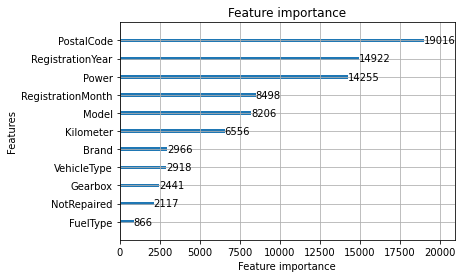

In [74]:
#Важность признаков для LightGBM
#lgb.plot_importance(light, figsize=(8,6));
plot_importance(model_lgb)
plt.show()

In [49]:
#Важность признаков для RandomForestRegressor
feature_RFR = pd.Series(modelRFR.feature_importances_,index=features_train.columns).sort_values(ascending=False)
feature_RFR.head()

RegistrationYear           0.663112
Power                      0.290243
Kilometer                  0.033842
VehicleType_convertible    0.007079
Model_transporter          0.004186
dtype: float64

### Вывод

<br> Анализируя важность признаков, можем заметить:
<br>CatBoostRegressor 
<br>Самый важный признак Год регистрации автомобиля (38,8%), затем мощность мотора (21.6%) и на третьем месте тип кузова автомобиля (10,8%).
<br>LightGBM
<br>Самый важный признак Почтовый индекс (22,9%), затем Год регистрации автомобиля (18.0%) и на третьем месте мощность мотора (17,2%).
<br>Также стоить обратить внимание, что модель LightGBM лучше не только по показателю RMSE, но и по времени выполнения операции.
<br>RandomForestRegressor
<br>Самый важный признак Год регистрации автомобиля (66,0%), затем мощность автомобиля (29.0%) и на третьем месте пробег (3,3%).

## Общий вывод

<div style="border:solid green 5px; padding: 20px">
    
**<font color="green">Анализ данных</font>**    
<br> В таблице 354369 строк. Нужно поменять тип данных в столбцах DateCrawled, DateCreated и LastSeen на datetime.
<br> В столбцах есть пропуски (5-20%), все эти пропуски с типом данных object. Чтобы не искажать данные на их месте поставим заглушку (no_info).
<br> Price - нужно внимательнее рассмотреть столбец. Медианна(4416) и среднее (2700.0) сильно отличается от максимального значения (20000.0). Кроме этого, есть нулевые значения.
<br> RegistrationYear - явные выбросы в столбце. Значения не могут быть больше 2016 года (год когда собрали данные) и меньше 1960 года (когда примерно серийно начали выпускать автомобили)
<br> Power - явные выбросы в столбце. Нужно внимательно рассмотреть столбец.
<br> Kilometer - явные аномалии в столбце. Видимо при заполнении пробег ограничен 150000 км. Менять ничего не будем.
<br> NumberOfPictures - данных в столбце нет. Его мы удалим.
<br> Видна небольшая отрицательная корреляция между ценой и пробегом автомобиля (-0,33). В остальном зависимость не прослеживается. Возможно после предобработки корреляция изменится.
 
**<font color="green">Предобработка данных</font>**
<br> В ходе предобработки пришлось удалить 29320 строк (8,27% данных). В результате заметно улучшилась корреляция между ценой и столбцами с годом регистрации (0,46), мощностью (0,49), пробегом  (-0,37), что совершенно логично.
<br> Все пропуски заполнили заглушками (no_info).
<br>Изменили тип данных в  DateCrawled, DateCreated и LastSeen на формат даты.   
    
**<font color="green">Подготовка данных</font>**
<br> Провели подготовку данных для построения моделей   
    
**<font color="green">Обучение моделей</font>**
<br> Лучший показатель CatBoostRegressor RMSE на train:  1570.1871103858482, вермя ожидания: 33min 6s
<br> CatBoostRegressor RMSE на test:  1550.9718317661147 вермя ожидания: 4min 32s
<br> Лучший показатель LightGBM RMSE на train:  1518.3147599332544, вермя ожидания: 24min 14s
<br> LightGBM RMSE на test:  1484.984838540657, вермя ожидания: 2min 23s
<br> Лучший показатель RandomForestRegressor RMSE на train:  2375.3806348381227, вермя ожидания: 7min 15s
<br>RandomForestRegressor RMSE на test: 2396.4540638852336, вермя ожидания: 36.1 s
    
**<font color="green">Анализ моделей</font>**
<br> Анализируя важность признаков, можем заметить:
<br>CatBoostRegressor 
<br>Самый важный признак Год регистрации автомобиля (38,8%), затем мощность мотора (21.6%) и на третьем месте тип кузова автомобиля (10,8%).
<br>LightGBM
<br>Самый важный признак Почтовый индекс (22,9%), затем Год регистрации автомобиля (18.0%) и на третьем месте мощность мотора (17,2%).
<br>Также стоить обратить внимание, что модель LightGBM лучше не только по показателю RMSE, но и по времени выполнения операции.
<br>RandomForestRegressor
<br>Самый важный признак Год регистрации автомобиля (66,0%), затем мощность автомобиля (29.0%) и на третьем месте пробег (3,3%).
    
**<font color="green">Итог</font>**
<br> Не смотря на то, что в настоящее время CatBoost считается лучшей моделью машинного обучения на данном датасете он уступает  LightGBM. Возможно, это связано с тем что данные созданы "искусственно".
<br> При необходимости, можно было получить более низкую RMSE, но на это потребовалось бы гораздо больше времени.